In [92]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx 
import pandas as pd
import random
from itertools import combinations
import glob
from tqdm._tqdm_notebook import tqdm_notebook
from ipywidgets import interact

### Задачи
#### 1.  Корреляция метрик центральности. 
Вычислите коэффициенты корреляции Пирсона, Спирмана и коэффициент ранговой корреляции Кендалла между различными метриками центральности для сети ca-netscience. Какие метрики коррелируют сильнее/слабее. Почему?

In [2]:
G=nx.read_edgelist('../data/raw/ca-netscience.txt', nodetype=int)

In [3]:
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau

In [5]:
centralities = {"d_centr" : d_centr, "cl_center" : cl_centr, "b_centr" : b_centr, "pg_rank" : pg_rank}
pearson = [(pair[0][0], pair[1][0], 
            pearsonr(pair[0][1], pair[1][1])) 
           for pair in combinations(centralities.items(), 2)]
spearman = [(pair[0][0], pair[1][0], 
            spearmanr(pair[0][1], pair[1][1])) 
            for pair in combinations(centralities.items(), 2)]
kendallt = [(pair[0][0], pair[1][0], 
             kendalltau(pair[0][1], pair[1][1])) 
            for pair in combinations(centralities.items(), 2)]

In [6]:
pearson

[('d_centr', 'cl_center', (0.3468385498308445, 3.738473352365928e-12)),
 ('d_centr', 'b_centr', (0.6883288078640052, 1.6288949440337164e-54)),
 ('d_centr', 'pg_rank', (0.9580285791089506, 1.1658804779009453e-206)),
 ('cl_center', 'b_centr', (0.4302320492333678, 1.6522442144347428e-18)),
 ('cl_center', 'pg_rank', (0.3666710871557104, 1.6668901216513776e-13)),
 ('b_centr', 'pg_rank', (0.7503372701075068, 9.267514064349868e-70))]

In [7]:
spearman

[('d_centr',
  'cl_center',
  SpearmanrResult(correlation=0.21607202543542003, pvalue=2.207456006926487e-05)),
 ('d_centr',
  'b_centr',
  SpearmanrResult(correlation=0.6940624160527029, pvalue=9.243593712626446e-56)),
 ('d_centr',
  'pg_rank',
  SpearmanrResult(correlation=0.9426702766423645, pvalue=9.053334289175823e-182)),
 ('cl_center',
  'b_centr',
  SpearmanrResult(correlation=0.32815809399999457, pvalue=5.7650050502286924e-11)),
 ('cl_center',
  'pg_rank',
  SpearmanrResult(correlation=0.1923242779616551, pvalue=0.00016521313189749197)),
 ('b_centr',
  'pg_rank',
  SpearmanrResult(correlation=0.7610604749080085, pvalue=7.361576667968014e-73))]

In [8]:
kendallt

[('d_centr',
  'cl_center',
  KendalltauResult(correlation=0.15956158446822052, pvalue=1.2125409819314218e-05)),
 ('d_centr',
  'b_centr',
  KendalltauResult(correlation=0.5863723587014148, pvalue=6.005153757968817e-47)),
 ('d_centr',
  'pg_rank',
  KendalltauResult(correlation=0.8291713154512923, pvalue=1.2382055458322474e-114)),
 ('cl_center',
  'b_centr',
  KendalltauResult(correlation=0.25460569871744615, pvalue=4.098578823728731e-11)),
 ('cl_center',
  'pg_rank',
  KendalltauResult(correlation=0.13177111506387817, pvalue=0.0001334884915738705)),
 ('b_centr',
  'pg_rank',
  KendalltauResult(correlation=0.6233121225303533, pvalue=7.813905514695115e-59))]

#### 2. Свойства и моделирование социальной сети. 
 *  Исследуйте свойства социальной сети Facebook (кусочек). Сравните  свойства с рандомизированной сетью.  
 *  Постройте случайную сеть с тем же числом вершин и числом ребер (подберите соответствующие параметры моделей). Сравните распределение степеней связности, кластеризацию. 

In [9]:
G_face = nx.read_edgelist('../data/raw/facebook.txt')
print("Number of nodes: %d" % nx.number_of_nodes(G_face))
print("Number of edges: %d" % nx.number_of_edges(G_face))

Number of nodes: 4039
Number of edges: 88234


In [10]:
import random
def randomization(G0,steps):
    G = G0.copy()
    L = list(G.edges()) # получаем список ребер графа
    edges = G.number_of_edges() - 1 # число ребер графа - 1 для индексации
    st = 0 
    while(st<steps):
        e1, e2 = random.randint(0, edges), random.randint(0, edges) # генерим два рандомных индекса ребер
        (P, Q) = L[e1] # раномное ребро номер один 
        (R, S) = L[e2] # рандомное ребро номер два
        # перелинкуем ребра между двумя парами рандомных вершин
        if ((P!=R) and (Q!=S) and(not G.has_edge(P, R)) and(not G.has_edge(Q, S))):
            G.remove_edge(R,S) 
            G.remove_edge(P,Q)
            G.add_edge(P,R)
            G.add_edge(Q,S)
            # запихнем новые ребра в список L ребер графа G
            L[e1]=(P,R)
            L[e2]=(Q,S)
            st=st+1
    return(G)

In [52]:
G_face_rand = randomization(G_face, 800000)

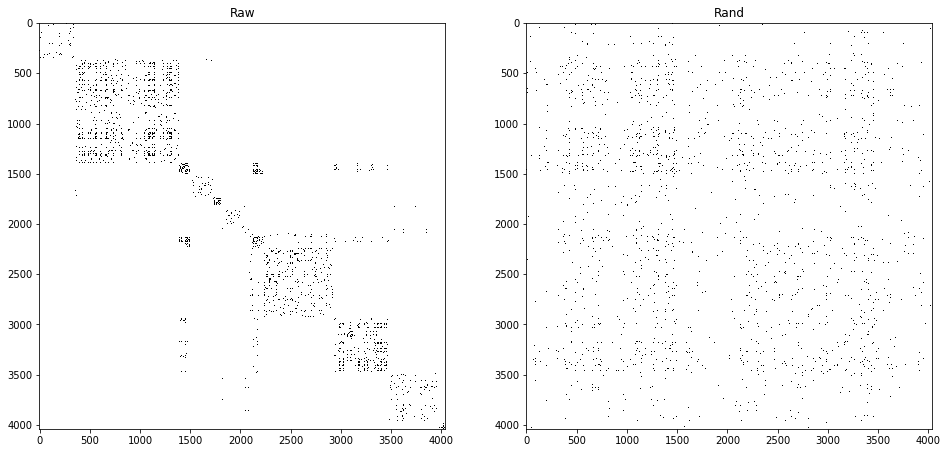

In [181]:
w=10
h=10
fig=plt.figure(figsize=(16, 8))
columns = 2
rows = 1
nets = [("Raw", nx.adjacency_matrix(G_face).todense()), ("Rand", nx.adjacency_matrix(G_face_rand).todense())]
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(nets[i-1][-1], cmap='binary')
    plt.title(nets[i-1][0])
plt.show()

In [44]:
degrees = [d for node, d in G_face.degree()]
print("Max degree: {}".format(max(degrees)))
print("Min degree: {}".format(min(degrees)))
print("Mean degree: {}".format(round(np.mean(degrees), ndigits=3)))

Max degree: 1045
Min degree: 1
Mean degree: 43.691


#### 3. Центральность персонажей в сети games of Thrones 

Будем изучать метрики центральностей персонажей в книгах "A Song of Ice and Fire" (G.R.R. Martin). Два героя связаны ребром, если их имена появляются в тексте на расстоянии не более 15 слов в соответствующей книге. [Данные](https://github.com/mathbeveridge/asoiaf) находятся в открытом доступе для 5 книг.
Сеть -- взвешенная, вес ребра определяется числом взаимодействий (упоминаний в тексте).

In [60]:
books = []
for path in tqdm_notebook(glob.glob('../data/raw/game_of_thrones_network/*-edges.csv')):
    books.append(pd.read_csv(path))

In [62]:
books[0].head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [99]:
graphs = [nx.from_pandas_edgelist(b, 'Source', 'Target', edge_attr="weight", create_using=nx.Graph()) for b in books]

In [100]:
print("Number of nodes: {}".format(nx.number_of_nodes(G1)))
print("Number of edges: {}".format(nx.number_of_edges(G1)))

Number of nodes: 187
Number of edges: 684


In [88]:
def draw_(G,pos, metrics):
    norm=1000/np.max(metrics)
    options = {
    'with_labels': False,
    'node_color': [v * norm for v in metrics],
    'node_size': [v * norm for v in metrics],
    'line_color': 'grey',
    'linewidths': 1,
    'width': 1,
    'cmap': 'YlGnBu'
    }
    nx.draw(G, pos, **options)

In [101]:
@interact
def show_metrics(i = list(range(1, 6))):
    g = graphs[i-1]
    degrees = [d for n, d in g.degree()]
    names = [n for n, d in g.degree()]
    print("Max degree of {1}: {0}".format(names[np.argmax(degrees)], max(degrees)))
    print("Min degree of {1}: {0}".format(names[np.argmin(degrees)], min(degrees)))
    print("Mean degree: {}".format(round(np.mean(degrees), ndigits=3)))

interactive(children=(Dropdown(description='i', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_classes=('w…

In [95]:
@interact
def show_graph(i=list(range(1,6))):
    pos = nx.spring_layout(G1,iterations=10)
    draw_(G1, pos, degrees)

interactive(children=(Dropdown(description='i', options=(1, 2, 3, 4, 5), value=1), Output()), _dom_classes=('w…

Постройте функцию weighted_degree, учитывающую вес ребер: 

$$d_{w}^{i}=\sum_{j} w_{i,j},$$ где $w_{i,j}$ -- вес ребра $(i,j)$ ($w_{i,j}=0$, если нет ребра между вершинами $i$ и $j$).

weighted_degree - аналог центральности по степени. Остальные метрики могут быть вычислены во взвешенной сети. 
Используя различные метрики центральности, проследите как менялась важность персонажа (например, Tyrion-Lannister ) от книги к книге. 
P.S. Информативнее сравнивать ранг по центральности ( т.е. какое место по значению центральности занимает персонаж в отсортированном списке), а не значение. 

In [136]:
baelish_idx = np.argwhere([l=='Petyr-Baelish' for l in list(graphs[0].nodes)])[0][0]

In [169]:
d_centralities = []
cl_centralities = []
b_centralities = []
pg_ranks = []

get_character_rank_by_index = lambda metrics, idx : np.argwhere(np.argsort(metrics)==idx)[0][0]

for g in graphs:
    d_centr = get_character_rank_by_index(list(nx.degree_centrality(g).values()), baelish_idx) # центральность по степени
    cl_centr = get_character_rank_by_index(list(nx.closeness_centrality(g).values()), baelish_idx) # центральность 
                                                                                                   #по близости
    # центральность по посредничеству
    b_centr = get_character_rank_by_index(list(nx.betweenness_centrality(g, weight='weight').values()), baelish_idx) 
    pg_rank = get_character_rank_by_index(list(nx.pagerank(g, weight='weight', alpha=0.75).values()), 
                                          baelish_idx) # значения page rank 
    d_centralities.append(d_centr)
    cl_centralities.append(cl_centr)
    b_centralities.append(b_centr)
    pg_ranks.append(pg_rank)

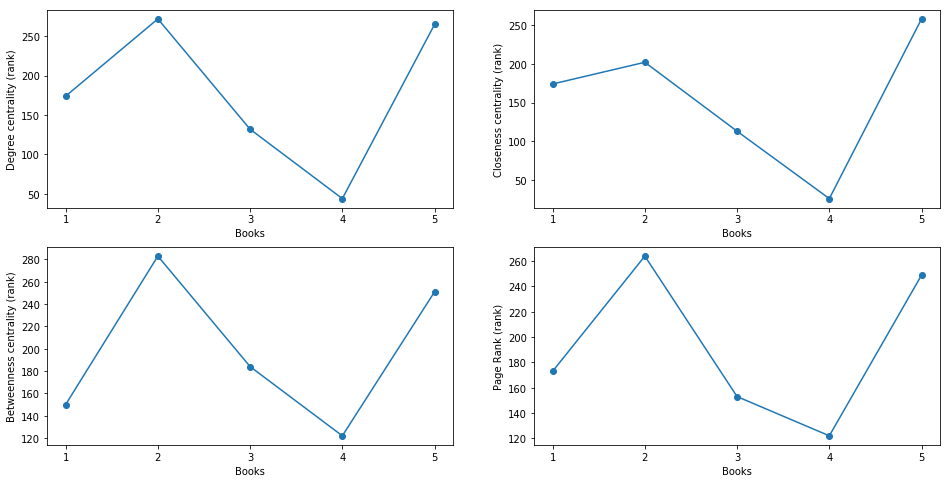

In [183]:
metrics_names = ["Degree centrality", "Closeness centrality", "Betweenness centrality", "Page Rank"]
metrics_lists = [d_centralities, cl_centralities, b_centralities, pg_ranks]
plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(np.arange(1, 6, dtype=int), metrics_lists[i], 'o-')
    plt.ylabel(metrics_names[i] + " (rank)")
    plt.xticks(ticks=np.arange(1,6))
    plt.xlabel('Books')
plt.show()

In [193]:
pairs = list(combinations(zip(metrics_lists, metrics_names), 2))
for p in pairs:
    print(p[0][1] + " - " + p[1][1] + ":")
    print("Pearson: {}".format(pearsonr(p[0][0], p[1][0])))
    print(spearmanr(p[0][0], p[1][0]))    
    print(kendalltau(p[0][0], p[1][0]))    
    print()

Degree centrality - Closeness centrality:
Pearson: (0.9579122521488818, 0.010299270642042009)
SpearmanrResult(correlation=0.8999999999999998, pvalue=0.03738607346849874)
KendalltauResult(correlation=0.7999999999999999, pvalue=0.05004352124870513)

Degree centrality - Betweenness centrality:
Pearson: (0.9138186870085497, 0.029974930501178852)
SpearmanrResult(correlation=0.8999999999999998, pvalue=0.03738607346849874)
KendalltauResult(correlation=0.7999999999999999, pvalue=0.05004352124870513)

Degree centrality - Page Rank:
Pearson: (0.9751635693095934, 0.004681047436111339)
SpearmanrResult(correlation=0.9999999999999999, pvalue=1.4042654220543672e-24)
KendalltauResult(correlation=0.9999999999999999, pvalue=0.014305878435429657)

Closeness centrality - Betweenness centrality:
Pearson: (0.7873541762370369, 0.11388253188755988)
SpearmanrResult(correlation=0.7999999999999999, pvalue=0.10408803866182788)
KendalltauResult(correlation=0.6, pvalue=0.1416446902951368)

Closeness centrality - Pa